In [71]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from math import sin, cos

plt.rcParams["figure.figsize"] = (20,10)


In [72]:
def derivatives(t, y):
    q = y[0]
    a = y[1]
    x = y[2]
    b = y[3]
    
    F = 0
    g = 9.8
    m_c = 1.0
    m_p = 0.1
    m = m_c + m_p
    l = 1.0/2.0
    m_l = m_p * l
    
    adot = (g * sin(q) - cos(q) * ((F + m_l * a**2 * sin(q)) / m)) / (l * (4/3 - m_p * cos(q))**2 / m)
    bdot = (F + m_l * (a**2 * sin(q) - adot * cos(q)))/m
    
    derivs = [
        a,
        adot,
        b,
        bdot,
    ]
    
    return derivs
    

In [89]:


t = np.linspace(0, 25, 10000)

initial_conditions = [
    0.02, 0, 0, 0
]

sol = solve_ivp(fun=derivatives, t_span=[t[0], t[-1]], y0=initial_conditions, t_eval=t)


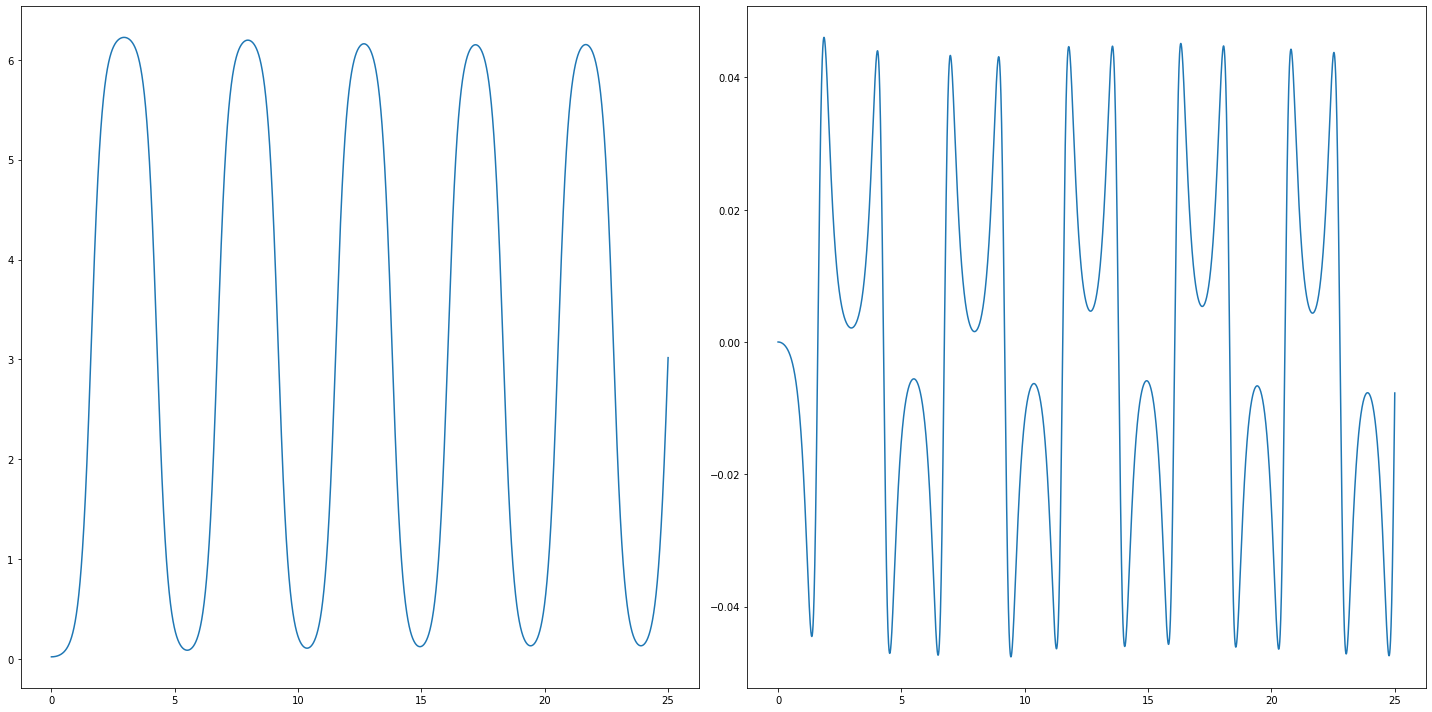

In [90]:
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0])

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[2])


plt.tight_layout()